<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/ARIMA_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ARIMA##
Three parameters to adjust:
- p: For auto regression ie. how many of the previous values should be used in the prediction. The largest non-zero shift position in PACF. Might need a few tries.
- d: differentiation to achieve stationarity. Typically 1 is enough. Max 2. adfuller can be used to determine stationarity.
- q:  For moving average. The largest non-zero shift position in ACF.

##Implementation##


##Stationarity##
To assess whehther a process is stationary, we use adfuller(df['passenger']) . If the second number is higher than 5%, we can't reject the null hypothesis and can't say the process is stationary.

If a process is not stationary, we start differentiating until in adfuller(df['passenger'].diff(.dropna())),the second value is below 5% then we reject the null hypothesis and we have acheieved stationarity.

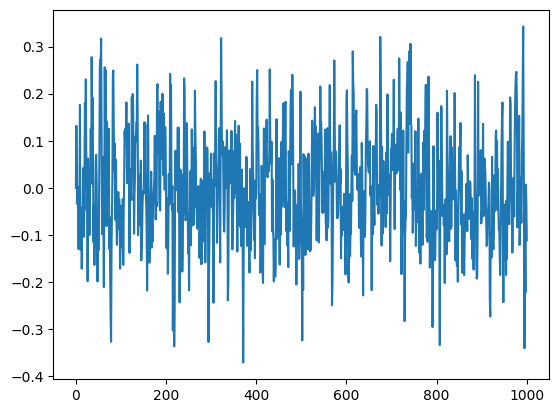

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [0]
for i in range (1000):
  x = 0.5 * x1[-1]  + 0.1 * np.random.randn()
  x1.append(x)
x1 = np.array(x1)
plt.plot(x1)

In [3]:
from statsmodels.tsa.stattools import adfuller
adfuller(x1)
## The above process is stationary because it's statistics doesn't change over time.
## adfuller(df['col'].diff().dropna()) will be the next thing to do if the process is not stationary.

(-18.525282603406175,
 2.106296057747482e-30,
 0,
 1000,
 {'1%': -3.4369061654329998, '5%': -2.86443457404, '10%': -2.568311209},
 -1723.9635465784277)

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2023-07-13 00:43:18--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  11.3MB/s    in 2.2s    

2023-07-13 00:43:21 (11.3 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



#General Rules#

##Identifying the order of differencing and the constant:##
Rule 1: If the series has positive autocorrelations out to a high number of lags (say, 10 or more), then it probably needs a higher order of differencing.
Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING.
Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest. (Not always, though. Slightly too much or slightly too little differencing can also be corrected with AR or MA terms. See rules 6 and 7.)
Rule 4: A model with no orders of differencing assumes that the original series is stationary (among other things, mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model).
Rule 5: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend



##Identifying the numbers of AR and MA terms:##
Rule 6: If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms.
Rule 7: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.
Rule 8: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL.
Rule 9: If there is a unit root in the AR part of the model--i.e., if the sum of the AR coefficients is almost exactly 1--you should reduce the number of AR terms by one and increase the order of differencing by one.
Rule 10: If there is a unit root in the MA part of the model--i.e., if the sum of the MA coefficients is almost exactly 1--you should reduce the number of MA terms by one and reduce the order of differencing by one.
Rule 11: If the long-term forecasts* appear erratic or unstable, there may be a unit root in the AR or MA coefficients.


##Identifying the seasonal part of the model:

Rule 12: If the series has a strong and consistent seasonal pattern, then you must use an order of seasonal differencing (otherwise the model assumes that the seasonal pattern will fade away over time). However, never use more than one order of seasonal differencing or more than 2 orders of total differencing (seasonal+nonseasonal).
Rule 13: If the autocorrelation of the appropriately differenced series is positive at lag s, where s is the number of periods in a season, then consider adding an SAR term to the model. If the autocorrelation of the differenced series is negative at lag s, consider adding an SMA term to the model.
The latter situation is likely to occur if a seasonal difference has been used, which should be done if the data has a stable and logical seasonal pattern.
The former is likely to occur if a seasonal difference has not been used, which would only be appropriate if the seasonal pattern is not stable over time. You should try to avoid using more than one or two seasonal parameters (SAR+SMA) in the same model, as this is likely to lead to overfitting of the data and/or problems in estimation.


#References#
https://people.duke.edu/~rnau/arimrule.htm